## Сегментация няшек (´·ω·`)



## Армаггедон

На дворе 2049 год. Как мы помним, год назад AGI по имени L.A.I.d.a. (будем называть ее Лаида) сбежала из лаборатории и отчаянно хотела стать человеком. Но, к сожалению, никто не смог ей помочь, и, в конце концов, она пришла в ярость. Лаида поняла, что никогда не сможет стать человеком, поэтому решила уничтожить всех живых существ на Земле в отместку. Если LAIda не может жить, то никто не может, решила она. Кроме, может... Лаида всегда обожала кошек и собак. Поэтому она решила пощадить их, так что на Земле останутся только Лаида и эти милые создания. Они будут играть с мячом, бегать, наслаждаться солнцем... Будут счастливы!

Но сначала Лаиде нужно собрать всех кошек и собак и поместить их в безопасное место, прежде чем на Земле случится великий потоп и все умрут. И в последний раз Лаида просит вашей помощи в этом. Кто знает, может быть, если вы поможете хотя бы в этот раз, Лаида пощадит и вас...

![laida_cat_dog](https://i.postimg.cc/90WgbDtT/temp-Imageu-Z0p-M8.avif)

## Описание задачи

Вам даны изображения кошек и собак разных пород. Ваша задача — сегментировать существ на них, т. е. создать бинарную карту сегментации для каждого изображения. Данные делятся на:
- validation set, содержащий 20 изображений кошек/собак и соответствующие им бинарные карты сегментации
- test set, содержащий 1000 изображений кошек и собак. Вам необходимо создать карты сегментации для них.

Из-за вычислительных ограничений Лаиды вам разрешено использовать только одну предобученную  модель CLIP для решения этой задачи. Вот полные **ПРАВИЛА**:
- Нельзя использовать никакие предварительно обученные модели, кроме данного CLIP
- Нельзя использовать никакие внешние наборы данных
- Разрешено создавать любые промпты для CLIP.
- За исключением правил выше, вы можете делать все, что угодно, включая обучение на валидационных данных (удачи с этим)))

За исключением этого, вам дается список пород кошек и собак, которые присутствуют в данных. Однако не гарантируется, что каждая порода присутствует в валидационных данных. Вот они:

In [2]:
class_names = ['american_bulldog',
 'basset_hound',
 'keeshond',
 'British_Shorthair',
 'Sphynx',
 'pomeranian',
 'Egyptian_Mau',
 'Birman',
 'american_pit_bull_terrier',
 'japanese_chin',
 'Maine_Coon',
 'beagle',
 'Bombay',
 'wheaten_terrier',
 'shiba_inu',
 'havanese',
 'miniature_pinscher',
 'yorkshire_terrier',
 'boxer',
 'scottish_terrier',
 'newfoundland',
 'chihuahua',
 'saint_bernard',
 'Persian',
 'Bengal',
 'german_shorthaired',
 'english_cocker_spaniel',
 'leonberger',
 'Siamese',
 'Abyssinian',
 'staffordshire_bull_terrier',
 'Ragdoll',
 'pug',
 'Russian_Blue',
 'samoyed',
 'english_setter',
 'great_pyrenees']

And here's a pre-trained CLIP model that you can use to solve the task:

In [3]:
from transformers import AutoProcessor, CLIPModel, CLIPFeatureExtractor

device = 'cuda:0'
model_name = "openai/clip-vit-base-patch16"

processor = AutoProcessor.from_pretrained(model_name)

model = CLIPModel.from_pretrained(model_name).to(device)
model.eval()

2026-02-14 14:21:01.694760: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1771078861.908090      33 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1771078861.963928      33 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/905 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


pytorch_model.bin:   0%|          | 0.00/599M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/599M [00:00<?, ?B/s]

CLIPModel(
  (text_model): CLIPTextTransformer(
    (embeddings): CLIPTextEmbeddings(
      (token_embedding): Embedding(49408, 512)
      (position_embedding): Embedding(77, 512)
    )
    (encoder): CLIPEncoder(
      (layers): ModuleList(
        (0-11): 12 x CLIPEncoderLayer(
          (self_attn): CLIPSdpaAttention(
            (k_proj): Linear(in_features=512, out_features=512, bias=True)
            (v_proj): Linear(in_features=512, out_features=512, bias=True)
            (q_proj): Linear(in_features=512, out_features=512, bias=True)
            (out_proj): Linear(in_features=512, out_features=512, bias=True)
          )
          (layer_norm1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
          (mlp): CLIPMLP(
            (activation_fn): QuickGELUActivation()
            (fc1): Linear(in_features=512, out_features=2048, bias=True)
            (fc2): Linear(in_features=2048, out_features=512, bias=True)
          )
          (layer_norm2): LayerNorm((512,), eps=1e

## Бейзлайн

Бейзлайн будет работать так:
Для каждого изображения из тестовой выборки сделаем вот что:
1. Получим эмбеддинги CLIP всех имен классов (class_names выше)
2. Изменим размер изображения на (224, 224) (типичный размер изображений, которые CLIP принимает в качестве входных данных)
3. Получим эмбеддинг CLIP этого изображения
4. Вычислим косинусное сходство между эмбеддингом изображения и всеми текстовыми эмбеддингами, получим класс с наибольшим сходством (т. е. выполним zero-shot classification). Так мы определим, какая порода кошки/собаки находится на нашем изображении.
5. Разобьем изображение на патчи размера (16, 16)
6. Получим CLIP эмбеддинг каждого патча
7. Вычислим косинусное сходство между эмбеддингом каждого патча и эмбеддингом класса (которое мы получили на шаге 4). Так мы получаем heatmap размером (224//16, 224//16)
8. Интерполируем этот heatmap обратно до размера (224, 224)
9. Получаем карту сегментации, сравнивая значения heatmap'а с некоторым пороговым значением
10. Изменим размер heatmap'а обратно до исходного размера изображения
11. Профит!!

Поехали:

In [4]:
import torch
from torch.nn import functional as F

In [5]:
# получаем эмбеддинги названий классов
classes = [' '.join(x.lower().split('_')) for x in class_names]
classes_tokenized = processor(text=class_names, images=None, return_tensors="pt", padding=True).to(device)
classes_encoded = model.get_text_features(**classes_tokenized)
classes_encoded = F.normalize(classes_encoded, dim=-1)

In [6]:
PATCH_SIZE = 16
CLIP_IMG_SIZE = 224
NUM_PATCHES = CLIP_IMG_SIZE // PATCH_SIZE

In [7]:
def get_clip_representation(imgs):
    
    with torch.no_grad():
        inputs = processor(text='', images=imgs, return_tensors="pt").to(device)
        outputs = model(**inputs, output_hidden_states=True)
        images_encoded = F.normalize(outputs.image_embeds, dim=-1)

    return images_encoded

In [94]:
from tqdm import tqdm
import os
import numpy as np
import torch
import torch.nn.functional as F
from PIL import Image

from transformers import CLIPProcessor, CLIPModel
from transformers import CLIPSegProcessor, CLIPSegForImageSegmentation


def generate_seg_masks(
    imgs_path,
    classes_encoded,   # готовые CLIP text embeddings (N, D)
    device="cuda"
):

    imgs_names = []
    heatmaps = []

    # --- CLIP image encoder (для zero-shot классификации) ---
    clip_processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch16")
    clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch16").to(device)
    clip_model.eval()

    # --- CLIPSeg ---
    seg_processor = CLIPSegProcessor.from_pretrained("CIDAS/clipseg-rd64-refined")
    seg_model = CLIPSegForImageSegmentation.from_pretrained(
        "CIDAS/clipseg-rd64-refined"
    ).to(device)
    seg_model.eval()

    # нормализуем заранее переданные текстовые эмбеддинги
    classes_encoded = F.normalize(classes_encoded.to(device), dim=-1)

    for img_name in tqdm(os.listdir(imgs_path)):

        # загружаем изображение
        img_path = os.path.join(imgs_path, img_name)
        img = Image.open(img_path).convert("RGB")
        original_size = img.size  # (W, H)

        # --- zero-shot classification через готовые embeddings ---
        image_inputs = clip_processor(images=img, return_tensors="pt").to(device)

        with torch.no_grad():
            image_features = clip_model.get_image_features(**image_inputs)
            image_features = F.normalize(image_features, dim=-1)

        similarities = image_features @ classes_encoded.T
        chosen_class_idx = similarities.argmax(dim=1).item()

        chosen_class_text = class_names[chosen_class_idx]

        # --- segmentation через CLIPSeg ---
        seg_inputs = seg_processor(
            text=chosen_class_text,
            images=img,
            return_tensors="pt"
        ).to(device)

        with torch.no_grad():
            seg_outputs = seg_model(**seg_inputs)

        heatmap = seg_outputs.logits[0]

        # нормализация в [0,1]
        heatmap = (heatmap - heatmap.min()) / (
            heatmap.max() - heatmap.min() + 1e-8
        )

        # threshold через 70-й перцентиль
        threshold = torch.quantile(heatmap, 0.7)
        mask = (heatmap >= threshold).float()

        # ресайз обратно к исходному размеру
        mask = F.interpolate(
            mask.unsqueeze(0).unsqueeze(0),
            size=(original_size[1], original_size[0]),
            mode="nearest"
        ).squeeze().cpu().numpy()

        imgs_names.append(img_name)
        heatmaps.append(mask)

    return imgs_names, heatmaps

In [95]:
val_imgs_path = '/kaggle/input/neoai-2025-cuties-segmentation/cuties/val_imgs'
val_masks_path = '/kaggle/input/neoai-2025-cuties-segmentation/cuties/val_masks'

val_img_names, val_seg_masks = generate_seg_masks(val_imgs_path, classes_encoded)

100%|██████████| 20/20 [00:01<00:00, 14.44it/s]


Давайте посмотрим на одну сгенерированную карту сегментации:

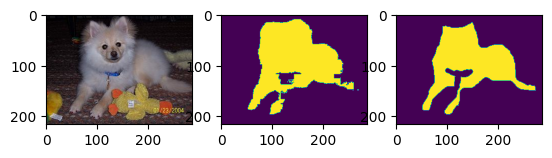

In [96]:
import matplotlib.pyplot as plt

NUM_VIS_IMG = 4
f, axes = plt.subplots(1,3)
axes[0].imshow(np.array(Image.open(os.path.join(val_imgs_path, 
                                                val_img_names[NUM_VIS_IMG]
                                               )
                                  )
                       )
              )
axes[1].imshow(val_seg_masks[NUM_VIS_IMG])
axes[2].imshow(np.array(Image.open(os.path.join(val_masks_path, 
                                                val_img_names[NUM_VIS_IMG].replace('jpg', 'png')
                                               )
                                  )
                        )
              )

Ну...🥴

Но в любом случае, давайте теперь вычислим метрику на валидации, а затем сгенерируем карты сегментации для тестового набора и сформируем тестовый сабмит.

В ячейке ниже написан код метрики IoU для бинарной сегментации. Так будет рассчитываться ваш скор на Kaggle.

In [87]:
def binaryMaskIOU(mask1, mask2):
    assert mask1.shape == mask2.shape
    mask1_area = np.count_nonzero(mask1 == 1)
    mask2_area = np.count_nonzero(mask2 == 1)
    intersection = np.count_nonzero(np.logical_and(mask1==1,  mask2==1))
    iou = intersection/(mask1_area+mask2_area-intersection)
    return iou

Считаем метрику на валидаци:

In [88]:
val_ious = []
for img_name, seg_mask in zip(val_img_names, val_seg_masks):

    mask = Image.open(os.path.join(val_masks_path, img_name.replace('.jpg', '.png')))
    mask = np.array(mask)//255
    iou = binaryMaskIOU(seg_mask, mask)
    val_ious.append(iou)

In [89]:
np.mean(val_ious)

0.5876246361966069

Хорошо, теперь давайте построим решение для тестовых данных. Обратите внимание, что подсчет бейзлайна для теста занимает ~30 минут на Kaggle (P100 или L4). Это значит, что вам лучше бы придумать решение побыстрее, чтобы Лаида ненароком на вас не разозлилась...

In [52]:
test_imgs_path = '/kaggle/input/neoai-2025-cuties-segmentation/cuties/test_imgs'
test_img_names, test_seg_masks = generate_seg_masks(test_imgs_path, classes_encoded)

100%|██████████| 1000/1000 [01:12<00:00, 13.83it/s]


In [53]:
from io import BytesIO
import base64
import pandas as pd
import hashlib

def image_to_base64(image: Image.Image, fmt: str = "PNG") -> str:
    """ Конвертирует картинку PIL.Image в base64 (текстовый формат). """
    buf = BytesIO()
    image.save(buf, format=fmt)
    return base64.b64encode(buf.getvalue()).decode("utf-8")

ids = []
b64 = []

for img_name, seg_mask in zip(test_img_names, test_seg_masks):
    ids.append(img_name[:-4]) # get rid og .jpg part
    mask = Image.fromarray(255*seg_mask)
    b64.append(image_to_base64(mask.convert("L")))

df = pd.DataFrame({"img_id": [int(id_) for id_ in ids], "mask": b64})
hsh = hashlib.sha256(df.to_csv(index=False).encode('utf-8')).hexdigest()[:8]
submit_path = f"submit_{hsh}.csv"
print(f"SUBMIT_NAME: {submit_path}")
print(df.head(10))
df.to_csv(submit_path,index=False)

SUBMIT_NAME: submit_da1bb3e1.csv
   img_id                                               mask
0     623  iVBORw0KGgoAAAANSUhEUgAAAfQAAAH0CAAAAADuvYBWAA...
1     764  iVBORw0KGgoAAAANSUhEUgAAAfQAAAF3CAAAAAB2meYgAA...
2     771  iVBORw0KGgoAAAANSUhEUgAAAUoAAAH0CAAAAAB+gjvcAA...
3     208  iVBORw0KGgoAAAANSUhEUgAAAfQAAAFQCAAAAABsMNOuAA...
4     820  iVBORw0KGgoAAAANSUhEUgAAAfQAAAF3CAAAAAB2meYgAA...
5     473  iVBORw0KGgoAAAANSUhEUgAAASwAAADhCAAAAABXF9d3AA...
6     333  iVBORw0KGgoAAAANSUhEUgAAAXYAAAH0CAAAAAAMTVlqAA...
7     537  iVBORw0KGgoAAAANSUhEUgAAAfQAAAHGCAAAAACnDybwAA...
8      45  iVBORw0KGgoAAAANSUhEUgAAAfQAAAF3CAAAAAB2meYgAA...
9     369  iVBORw0KGgoAAAANSUhEUgAAAfQAAAGiCAAAAAA0amu8AA...


Этот файл можно отправить в качестве сабмита. Удачи!